In [1]:
DELHI_LATITUDE = '28.52'
DELHI_LONGITUDE = '77.25'
print('The geograpical coordinates of delhi are {}, {}.'.format(DELHI_LATITUDE, DELHI_LONGITUDE))

The geograpical coordinates of delhi are 28.52, 77.25.


In [2]:
FOURSQUARE_CLIENT_ID = 'A4YC2YFW5I3PQWXEYFAHJY0A2FYETJXM0VDO0MYCR2GLZCSU'
FOURSQUARE_CLIENT_SECRET = 'FQUDITQF1HNOS24MXDYYNFDAZ5LWMNAORFCIE50XHDQIQYD0'
RADIUS = 4000 # 4 Km
NO_OF_VENUES = 100
VERSION = '20190612' # Current date

In [3]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize
import requests

pd.set_option('display.max_rows', None)

offset = 0
total_venues = 0
foursquare_venues = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng'])

while (True):
    url = ('https://api.foursquare.com/v2/venues/explore?client_id={}'
           '&client_secret={}&v={}&ll={},{}&radius={}&limit={}&offset={}').format(FOURSQUARE_CLIENT_ID, 
                                                                        FOURSQUARE_CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        DELHI_LATITUDE, 
                                                                        DELHI_LONGITUDE, 
                                                                        RADIUS,
                                                                        NO_OF_VENUES,
                                                                        offset)
    result = requests.get(url).json()
    venues_fetched = len(result['response']['groups'][0]['items'])
    total_venues = total_venues + venues_fetched
    print("Total {} venues fetched within a total radius of {} Km".format(venues_fetched, RADIUS/1000))

    venues = result['response']['groups'][0]['items']
    venues = json_normalize(venues)

    # Filter the columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    venues = venues.loc[:, filtered_columns]

    # Filter the category for each row
    venues['venue.categories'] = venues.apply(get_category_type, axis = 1)

    # Clean all column names
    venues.columns = [col.split(".")[-1] for col in venues.columns]
    foursquare_venues = pd.concat([foursquare_venues, venues], axis = 0, sort = False)
    
    if (venues_fetched < 100):
        break
    else:
        offset = offset + 100

foursquare_venues = foursquare_venues.reset_index(drop = True)
print("\nTotal {} venues fetched".format(total_venues))

Total 100 venues fetched within a total radius of 4.0 Km
Total 74 venues fetched within a total radius of 4.0 Km

Total 174 venues fetched


In [5]:
headers = {'user-key': '<USER_KEY>'}
venues_information = []

for index, row in foursquare_venues.iterrows():
    print("Fetching data for venue: {}".format(index + 1))
    venue = []
    url = ('https://developers.zomato.com/api/v2.1/search?q={}' + 
          '&start=0&count=1&lat={}&lon={}&sort=real_distance').format(row['name'], row['lat'], row['lng'])
    result = requests.get(url, headers = headers).json()
def restaurants():
    
    if (len(result['restaurants']) > 0):
        venue.append(result['restaurants'][0]['restaurant']['name'])
        venue.append(result['restaurants'][0]['restaurant']['location']['latitude'])
        venue.append(result['restaurants'][0]['restaurant']['location']['longitude'])
        venue.append(result['restaurants'][0]['restaurant']['average_cost_for_two'])
        venue.append(result['restaurants'][0]['restaurant']['price_range'])
        venue.append(result['restaurants'][0]['restaurant']['user_rating']['aggregate_rating'])
        venue.append(result['restaurants'][0]['restaurant']['location']['address'])
        venues_information.append(venue)
    else:
        venues_information.append(np.zeros(6))
    return restaurants
zomato_venues = pd.DataFrame(venues_information, 
                                  columns = ['venue', 'latitude', 
                                             'longitude', 'price_for_two', 
                                             'price_range', 'rating', 'address'])

Fetching data for venue: 1
Fetching data for venue: 2
Fetching data for venue: 3
Fetching data for venue: 4
Fetching data for venue: 5
Fetching data for venue: 6
Fetching data for venue: 7
Fetching data for venue: 8
Fetching data for venue: 9
Fetching data for venue: 10
Fetching data for venue: 11
Fetching data for venue: 12
Fetching data for venue: 13
Fetching data for venue: 14
Fetching data for venue: 15
Fetching data for venue: 16
Fetching data for venue: 17
Fetching data for venue: 18
Fetching data for venue: 19
Fetching data for venue: 20
Fetching data for venue: 21
Fetching data for venue: 22
Fetching data for venue: 23
Fetching data for venue: 24
Fetching data for venue: 25
Fetching data for venue: 26
Fetching data for venue: 27
Fetching data for venue: 28
Fetching data for venue: 29
Fetching data for venue: 30
Fetching data for venue: 31
Fetching data for venue: 32
Fetching data for venue: 33
Fetching data for venue: 34
Fetching data for venue: 35
Fetching data for venue: 36
F

In [6]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

'conda' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df_india = df[df['Country Code'] == 1]
## New Delhi
df_NDLS = df_india[df_india['City'] == 'New Delhi']

df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

In [8]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [9]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [10]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

In [18]:
foursquare_venues.head()
foursquare_venues.rename(columns={'lat':'Latitude','lng':'Longitude'},inplace=True)
foursquare_venues.head()

name          categories  Latitude  Longitude
0                     Starbucks         Coffee Shop   28.5341    77.2431
1                   City Of Joy          Restaurant   28.5327    77.2530
2  Yeti - The Himalayan Kitchen  Tibetan Restaurant   28.5336    77.2424
3                     Culinaire     Thai Restaurant   28.5308    77.2458
4       Artusi Ristorante e Bar  Italian Restaurant   28.5335    77.2420

In [11]:
delhi_map = folium.Map(location = [DELHI_LATITUDE, DELHI_LONGITUDE], zoom_start = 13)

for name, latitude, longitude in zip(foursquare_venues['name'], foursquare_venues['lat'], foursquare_venues['lng']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'green',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(delhi_map)  

delhi_map.save("Foursquare.html")
delhi_map

In [12]:
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=10)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

In [19]:
df_full = pd.merge(foursquare_venues,df_Res,on='Latitude')

In [20]:
df_full

name               categories  \
0                                   Starbucks              Coffee Shop   
1                                   Starbucks              Coffee Shop   
2                                   Starbucks              Coffee Shop   
3                                   Starbucks              Coffee Shop   
4                                   Starbucks              Coffee Shop   
5                                   Starbucks              Coffee Shop   
6                                   Starbucks              Coffee Shop   
7                                   Starbucks              Coffee Shop   
8                                   Starbucks              Coffee Shop   
9                                   Starbucks              Coffee Shop   
10                                  Starbucks              Coffee Shop   
11                                City Of Joy               Restaurant   
12                                City Of Joy               Restaurant   
13               Yeti - The Himalayan Kitchen       Tibetan Restaurant   
14               Yeti - The Himalayan Kitchen       Tibetan Restaurant   
15               Yeti - The Himalayan Kitchen       Tibetan Restaurant   
16               Yeti - The Himalayan Kitchen       Tibetan Restaurant   
17               Yeti - The Himalayan Kitchen       Tibetan Restaurant   
18               Yeti - The Himalayan Kitchen       Tibetan Restaurant   
19                                  Culinaire          Thai Restaurant   
20                    Artusi Ristorante e Bar       Italian Restaurant   
21                    Artusi Ristorante e Bar       Italian Restaurant   
22                    Artusi Ristorante e Bar       Italian Restaurant   
23                    Artusi Ristorante e Bar       Italian Restaurant   
24                    Artusi Ristorante e Bar       Italian Restaurant   
25                                  Lean Chef               Restaurant   
26                                  Lean Chef               Restaurant   
27                                  Lean Chef               Restaurant   
28                                  Lean Chef               Restaurant   
29                                  Lean Chef               Restaurant   
30                                       24/7        Convenience Store   
31                                       24/7        Convenience Store   
32                                       24/7        Convenience Store   
33                                       24/7        Convenience Store   
34                                       24/7        Convenience Store   
35                    Chocolateria San Churro             Dessert Shop   
36                    Chocolateria San Churro             Dessert Shop   
37                               China Garden       Chinese Restaurant   
38                                     Subway           Sandwich Place   
39                            Select Citywalk            Shopping Mall   
40                            Select Citywalk            Shopping Mall   
41                            Select Citywalk            Shopping Mall   
42                            Select Citywalk            Shopping Mall   
43                            Select Citywalk            Shopping Mall   
44                                YUM YUM CHA      Japanese Restaurant   
45                                YUM YUM CHA      Japanese Restaurant   
46                                YUM YUM CHA      Japanese Restaurant   
47                                YUM YUM CHA      Japanese Restaurant   
48                                YUM YUM CHA      Japanese Restaurant   
49                 The Coffee Bean & Tea Leaf              Coffee Shop   
50                 The Coffee Bean & Tea Leaf              Coffee Shop   
51                 The Coffee Bean & Tea Leaf              Coffee Shop   
52                 The Coffee Bean & Tea Leaf              Coffee Shop   
53                 The Coffee Bean & Tea Leaf

In [22]:
df_full.columns

Index(['name', 'categories', 'Latitude', 'Longitude_x', 'Restaurant Name',
       'Locality', 'Longitude_y', 'Cuisines', 'Aggregate rating',
       'Rating text', 'Votes', 'Cluster'],
      dtype='object')

In [26]:
df_full.head()

name   categories  Latitude  Longitude_x Restaurant Name  \
0  Starbucks  Coffee Shop   28.5341      77.2431          Fudged   
1  Starbucks  Coffee Shop   28.5341      77.2431   The Beer Cafe   
2  Starbucks  Coffee Shop   28.5341      77.2431  The Health Box   
3  Starbucks  Coffee Shop   28.5341      77.2431          Karuna   
4  Starbucks  Coffee Shop   28.5341      77.2431       Open Oven   

                 Locality  Longitude_y                            Cuisines  \
0  Greater Kailash (GK) 2      77.2422                    Desserts, Bakery   
1  Greater Kailash (GK) 2      77.2435  Finger Food, North Indian, Italian   
2  Greater Kailash (GK) 2      77.2422                        Healthy Food   
3           Malviya Nagar      77.2170                        South Indian   
4           Malviya Nagar      77.2094         Bakery, Desserts, Fast Food   

   Aggregate rating Rating text  Votes  Cluster  
0               3.0     Average     17        4  
1               3.4     Average     90        4  
2               3.5        Good    124        4  
3               3.0     Average     15        4  
4               3.4     Average    103        1

In [28]:
df_full.shape

(569, 12)

<BarContainer object of 51 artists>

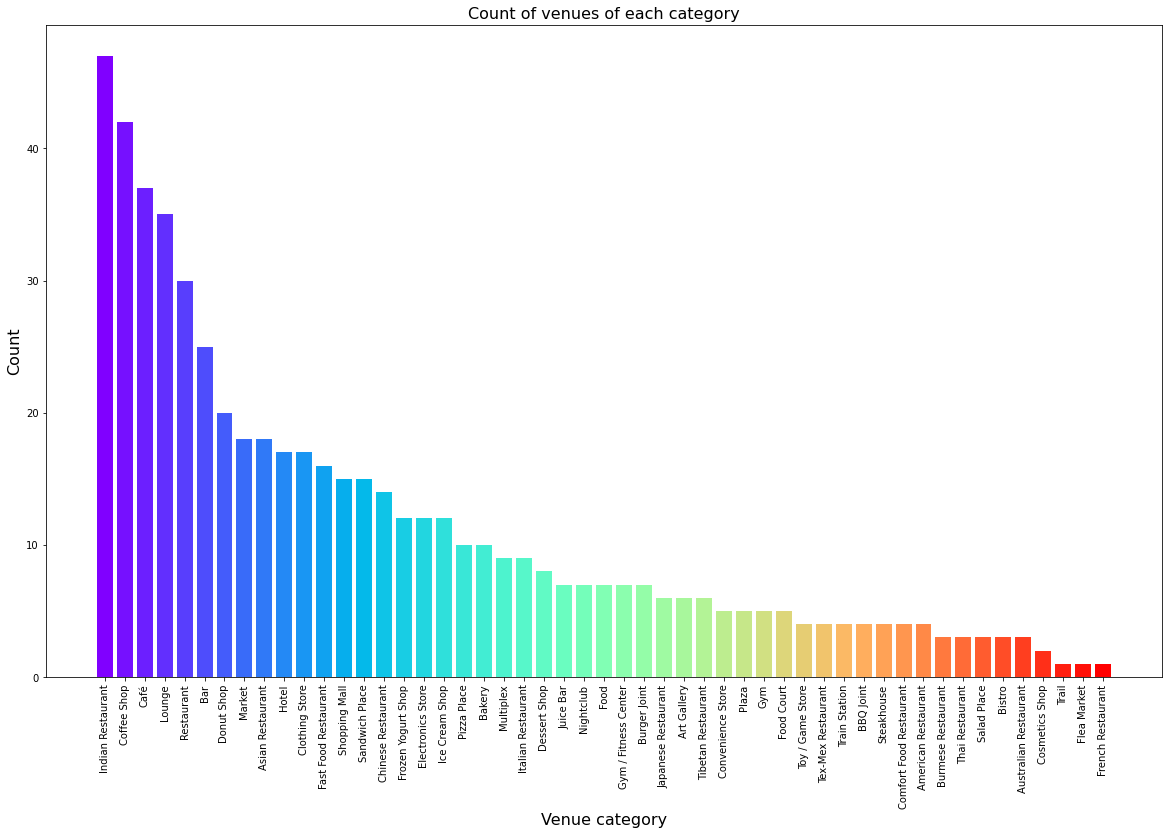

In [30]:
venue_distribution = df_full['categories'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

Text(0.5, 1.0, 'Count of venues with given rating')

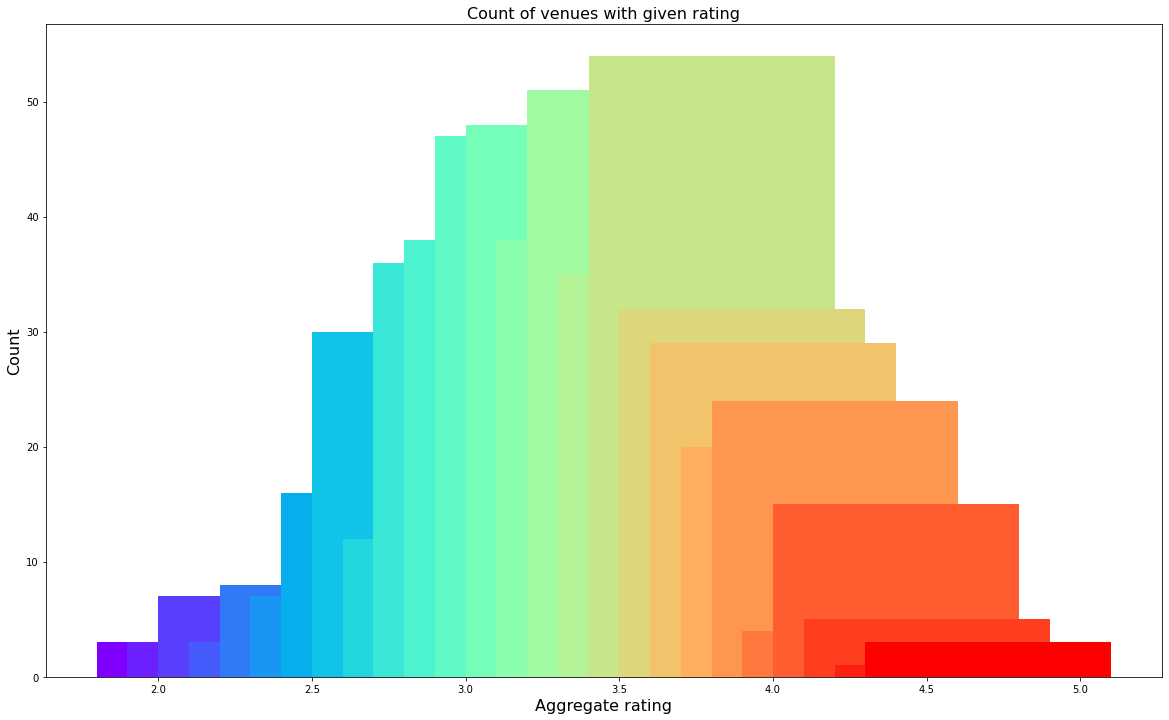

In [35]:
rating = df_full['Aggregate rating'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.bar(rating.index, rating.values, color = cm.rainbow(np.linspace(0, 1, len(rating.index))))
plt.xlabel("Aggregate rating", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues with given rating", fontsize = 16)

In [40]:
bins = [1.0, 2.0, 3.0, 4.0, 5.0]
labels = ['Low', 'Okay', 'Good', 'Very good']
df_full['rating_bin'] = pd.cut(selected_venues['Aggregate rating'].astype(float), bins = bins, labels = labels, include_lowest = True)

In [42]:
color_map = {'Low': 'red', 'Okay': 'orange', 'Good': 'green', 'Very good': 'darkgreen'}

delhi_map = folium.Map(location = [DELHI_LATITUDE, DELHI_LONGITUDE], zoom_start = 13)

for name,Locality , Latitude, Longitude_x, rating_bin in zip(df_full['categories'], 
                                                          df_full['Locality'], 
                                                          df_full['Latitude'], 
                                                          df_full['Longitude_x'], 
                                                          df_full['rating_bin']):
    label = '{}, {}'.format(name, Locality)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [Latitude, Longitude_x],
         radius = 5,
        popup = label,
        color = 'red',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(delhi_map)  

delhi_map.save("Ratings.html")
delhi_map

Text(0.5, 1.0, 'Count of vote')

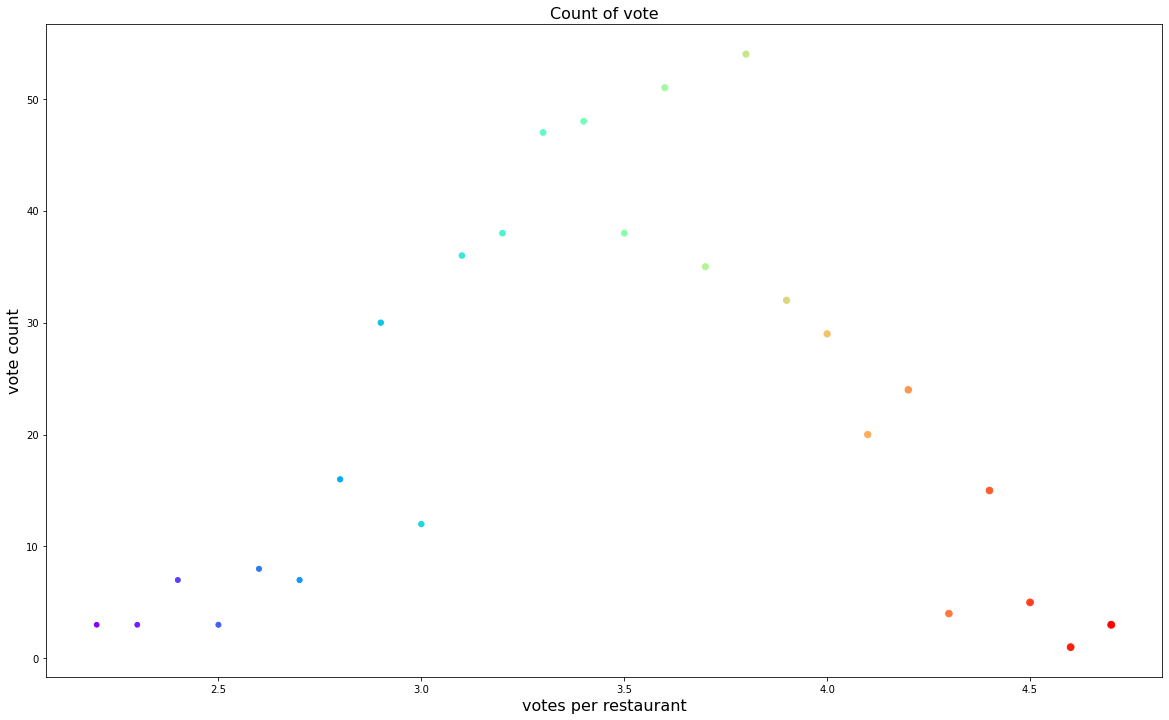

In [49]:
average_prices = df_full['Aggregate rating'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.scatter(average_prices.index, 
            average_prices.values, 
            s = average_prices.index*10, 
            c = cm.rainbow(np.linspace(0, 1, len(average_prices.index))))
plt.xlabel("votes per restaurant", fontsize = 16)
plt.ylabel("vote count", fontsize = 16)
plt.title("Count of vote", fontsize = 16)

In [ ]:
from sklearn.cluster import KMeans

NO_OF_CLUSTERS = 2

clustering = df_full.drop(['venue', 'address', 'rating_bin', 'categories'], 1)
kMeans = KMeans(n_clusters = NO_OF_CLUSTERS, random_state = 0).fit(clustering)
df_full.insert(0, 'cluster_labels', kMeans.labels_)
df_full.head(5)